In [1]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

 
#tf.enable_eager_execution()
tf.set_random_seed(42)
#warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
tf.executing_eagerly() 
tf.__version__


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


In [2]:
### Read the dataset
df = pd.read_csv('../dataset/bank.csv')

In [3]:
df.shape
df.head()
df.tail()
df.dtypes
df.info
df.isnull().values.any()
df.isnull().sum().sum()
df.isna().values.any()
df.isna().sum().sum()
df.describe().transpose()

(10000, 14)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<bound method DataFrame.info of       RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
0             1    15634602        Hargrave          619    France  Female   
1             2    15647311            Hill          608     Spain  Female   
2             3    15619304            Onio          502    France  Female   
3             4    15701354            Boni          699    France  Female   
4             5    15737888        Mitchell          850     Spain  Female   
5             6    15574012             Chu          645     Spain    Male   
6             7    15592531        Bartlett          822    France    Male   
7             8    15656148          Obinna          376   Germany  Female   
8             9    15792365              He          501    France    Male   
9            10    15592389              H?          684    France    Male   
10           11    15767821          Bearce          528    France    Male   
11           12    15737173     

False

0

False

0

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
###Drop the columns which are unique for all users like IDs
###Distinguish the feature and target set 
df_original = df.copy()
x =  df.drop(['CustomerId','RowNumber','Surname','Exited'], axis=1)
#y =  df.pop("Exited")
y = df["Exited"]

x.head()
y.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
x.info()
#pd.Categorical(x["Geography"]).codes
#pd.Categorical(x["Gender"]).codes
x["Geography"] = pd.Categorical(x["Geography"]).codes
x["Gender"] = pd.Categorical(df["Gender"]).codes
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int8
Gender             10000 non-null int8
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null 

In [7]:
x.apply(lambda x: len(x.unique()))



CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [8]:
###Divide the data set into Train and test sets


trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.25, random_state=1)

In [9]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(7500, 10) (7500,) (2500, 10) (2500,)


In [10]:
#Normalize the data
#x_n = tf.nn.l2_normalize(x,1)

#Option 1
normalizer = Normalizer().fit(trainX)
xtrainnorm = normalizer.transform(trainX) 
xtestnorm = normalizer.transform(testX) 

#Option 2
sc=StandardScaler()
xtrainstdsclr = sc.fit_transform(trainX)
xteststdsclr = sc.transform(testX)

print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(xtrainnorm.shape, xtestnorm.shape, xtrainstdsclr.shape, xteststdsclr.shape)



(7500, 10) (7500,) (2500, 10) (2500,)
(7500, 10) (2500, 10) (7500, 10) (2500, 10)


In [11]:
#Base Model

model = Sequential([
 Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10),
 Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [12]:


#model.fit(xtrainnorm, trainY, batch_size = 10, nb_epoch = 40)
#score, acc = classifier.evaluate(xtestnorm, testY, verbose=0)
#Later on - need to understand why acc is not improving with each epoch when xtrainnorm is used

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)



Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/25
7500/7500 [==============================] - 1s 106us/step - loss: 0.4945 - acc: 0.7976
Epoch 2/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.4310 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 69us/step - loss: 0.4255 - acc: 0.7977
Epoch 4/25
7500/7500 [==============================] - 1s 71us/step - loss: 0.4223 - acc: 0.8140
Epoch 5/25
7500/7500 [==============================] - 1s 73us/step - loss: 0.4197 - acc: 0.8261
Epoch 6/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.4180 - acc: 0.8285
Epoch 7/25
7500/7500 [==============================] - 1s 70us/step - loss: 0.4169 - acc: 0.8299
Epoch 8/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4158 - acc: 0.8319
Epoch 9/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4149 - acc: 0.8324: 0s - loss: 0.4256 - a
Epoch 10/25
7500/7500 [==============================] - 1s 76us/step - loss: 0.4142 - acc: 0.

In [13]:
y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)






Test accuracy( from evaluate): 0.8332
Accuracy(from confusion matrix) 0.8332
             precision    recall  f1-score   support

          0       0.84      0.97      0.90      1980
          1       0.74      0.31      0.44       520

avg / total       0.82      0.83      0.81      2500

[[1922   58]
 [ 359  161]]
Area under the curve: = 0.64


Text(0.5,15,'predicted label')

Text(91.68,0.5,'true label')

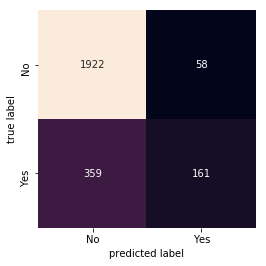

In [14]:
#Confusion matrix plot with labels
#sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['No','Yes'], yticklabels=['No','Yes'] )
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, xticklabels=['No','Yes'], yticklabels=['No','Yes'] )
plt.xlabel('predicted label')
plt.ylabel('true label')

Text(0.5,0,'False positive rate')

Text(0,0.5,'True positive rate')

Text(0.5,1,'ROC curve')

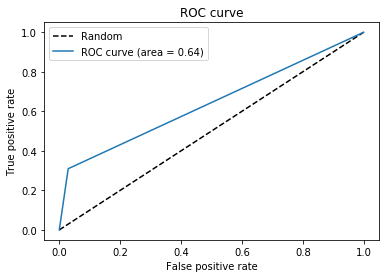

In [15]:
#Roc plot
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr_ann,tpr_ann,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')



In [16]:
#Model tuning 1 - This has given the best accuracy. 
#Add additional hidden layer
model = Sequential([
 Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10),
 Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)






C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is

Epoch 1/25
7500/7500 [==============================] - 1s 117us/step - loss: 0.4895 - acc: 0.7968
Epoch 2/25
7500/7500 [==============================] - 1s 74us/step - loss: 0.4283 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.4199 - acc: 0.7984
Epoch 4/25
7500/7500 [==============================] - 1s 73us/step - loss: 0.4104 - acc: 0.8268
Epoch 5/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.4011 - acc: 0.8284
Epoch 6/25
7500/7500 [==============================] - 1s 73us/step - loss: 0.3930 - acc: 0.8312
Epoch 7/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.3861 - acc: 0.8413
Epoch 8/25
7500/7500 [==============================] - 1s 74us/step - loss: 0.3819 - acc: 0.8455
Epoch 9/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.3781 - acc: 0.8463
Epoch 10/25
7500/7500 [==============================] - 1s 74us/step - loss: 0.3758 - acc: 0.8456
Epoch 11/25
7500/7

Test accuracy( from evaluate): 0.8528
Accuracy(from confusion matrix) 0.8528
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1980
          1       0.77      0.41      0.54       520

avg / total       0.84      0.85      0.83      2500

[[1917   63]
 [ 305  215]]
Area under the curve: = 0.69


In [17]:
#Model tuning 2
#Add more neurons
model = Sequential([
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 10),
 Dense(output_dim = 12, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 8, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This i

Epoch 1/25
7500/7500 [==============================] - 1s 125us/step - loss: 0.4749 - acc: 0.7973
Epoch 2/25
7500/7500 [==============================] - 1s 74us/step - loss: 0.4282 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 71us/step - loss: 0.4215 - acc: 0.8209
Epoch 4/25
7500/7500 [==============================] - 1s 67us/step - loss: 0.4183 - acc: 0.8280
Epoch 5/25
7500/7500 [==============================] - 1s 70us/step - loss: 0.4161 - acc: 0.8308
Epoch 6/25
7500/7500 [==============================] - 1s 80us/step - loss: 0.4140 - acc: 0.8312
Epoch 7/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4127 - acc: 0.8329
Epoch 8/25
7500/7500 [==============================] - 1s 73us/step - loss: 0.4114 - acc: 0.8337
Epoch 9/25
7500/7500 [==============================] - 1s 75us/step - loss: 0.4099 - acc: 0.8336
Epoch 10/25
7500/7500 [==============================] - 1s 74us/step - loss: 0.4089 - acc: 0.8335
Epoch 11/25
7500/7

Test accuracy( from evaluate): 0.8364
Accuracy(from confusion matrix) 0.8364
             precision    recall  f1-score   support

          0       0.84      0.98      0.90      1980
          1       0.77      0.31      0.44       520

avg / total       0.83      0.84      0.81      2500

[[1932   48]
 [ 361  159]]
Area under the curve: = 0.64


In [18]:
#Model tuning 3
#use L2 regularizers
model = Sequential([
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 10, kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim = 12, init = 'uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, kernel_regularizer=<keras.reg..., units=8, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=12, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=8, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykern

Epoch 1/25
7500/7500 [==============================] - 1s 138us/step - loss: 0.4768 - acc: 0.7977
Epoch 2/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4307 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 76us/step - loss: 0.4245 - acc: 0.8104
Epoch 4/25
7500/7500 [==============================] - 1s 77us/step - loss: 0.4208 - acc: 0.8263
Epoch 5/25
7500/7500 [==============================] - 1s 76us/step - loss: 0.4184 - acc: 0.8296
Epoch 6/25
7500/7500 [==============================] - 1s 76us/step - loss: 0.4171 - acc: 0.8291
Epoch 7/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4154 - acc: 0.8332
Epoch 8/25
7500/7500 [==============================] - 1s 77us/step - loss: 0.4136 - acc: 0.8320
Epoch 9/25
7500/7500 [==============================] - 1s 79us/step - loss: 0.4124 - acc: 0.8333
Epoch 10/25
7500/7500 [==============================] - 1s 77us/step - loss: 0.4112 - acc: 0.8316
Epoch 11/25
7500/7

Test accuracy( from evaluate): 0.8364
Accuracy(from confusion matrix) 0.8364
             precision    recall  f1-score   support

          0       0.84      0.97      0.90      1980
          1       0.75      0.32      0.45       520

avg / total       0.83      0.84      0.81      2500

[[1926   54]
 [ 355  165]]
Area under the curve: = 0.65


In [19]:
#Model tuning 4
#use L1 regularizers
model = Sequential([
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 10, kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim = 12, init = 'uniform', activation = 'relu', kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', kernel_regularizer=regularizers.l1(0.0001)),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, kernel_regularizer=<keras.reg..., units=8, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=12, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=8, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykern

Epoch 1/25
7500/7500 [==============================] - 1s 145us/step - loss: 0.4980 - acc: 0.7976
Epoch 2/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4370 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4355 - acc: 0.7977
Epoch 4/25
7500/7500 [==============================] - 1s 79us/step - loss: 0.4346 - acc: 0.7977
Epoch 5/25
7500/7500 [==============================] - 1s 79us/step - loss: 0.4345 - acc: 0.7977
Epoch 6/25
7500/7500 [==============================] - 1s 80us/step - loss: 0.4329 - acc: 0.7977
Epoch 7/25
7500/7500 [==============================] - 1s 80us/step - loss: 0.4278 - acc: 0.8029
Epoch 8/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4237 - acc: 0.8207
Epoch 9/25
7500/7500 [==============================] - 1s 79us/step - loss: 0.4217 - acc: 0.8288
Epoch 10/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.4200 - acc: 0.8309
Epoch 11/25
7500/7

Test accuracy( from evaluate): 0.8332
Accuracy(from confusion matrix) 0.8332
             precision    recall  f1-score   support

          0       0.85      0.97      0.90      1980
          1       0.72      0.33      0.45       520

avg / total       0.82      0.83      0.81      2500

[[1914   66]
 [ 351  169]]
Area under the curve: = 0.65


In [20]:
#Model tuning 5
#Add Dropout layers
from keras.layers.core import Dropout
model = Sequential([
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 10),
 Dropout(0.2),
 Dense(output_dim = 12, init = 'uniform', activation = 'relu'),
 Dropout(0.2),
 Dense(output_dim = 8, init = 'uniform', activation = 'relu'),
 Dropout(0.2),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument i

Epoch 1/25
7500/7500 [==============================] - 1s 175us/step - loss: 0.4865 - acc: 0.7977
Epoch 2/25
7500/7500 [==============================] - 1s 91us/step - loss: 0.4467 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 91us/step - loss: 0.4418 - acc: 0.7977
Epoch 4/25
7500/7500 [==============================] - 1s 89us/step - loss: 0.4422 - acc: 0.7977
Epoch 5/25
7500/7500 [==============================] - 1s 89us/step - loss: 0.4394 - acc: 0.7977
Epoch 6/25
7500/7500 [==============================] - 1s 91us/step - loss: 0.4415 - acc: 0.7977
Epoch 7/25
7500/7500 [==============================] - 1s 93us/step - loss: 0.4367 - acc: 0.7977
Epoch 8/25
7500/7500 [==============================] - 1s 89us/step - loss: 0.4383 - acc: 0.7977
Epoch 9/25
7500/7500 [==============================] - 1s 89us/step - loss: 0.4375 - acc: 0.7977
Epoch 10/25
7500/7500 [==============================] - 1s 92us/step - loss: 0.4327 - acc: 0.7977
Epoch 11/25
7500/7

Test accuracy( from evaluate): 0.792
Accuracy(from confusion matrix) 0.792
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      1980
          1       0.00      0.00      0.00       520

avg / total       0.63      0.79      0.70      2500

[[1980    0]
 [ 520    0]]
Area under the curve: = 0.50


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
#Model tuning 6
#Use Early stopping
from keras.callbacks import EarlyStopping
model = Sequential([
 Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 10),
 Dropout(0.2),
 Dense(output_dim = 12, init = 'uniform', activation = 'relu'),
 Dropout(0.2),
 Dense(output_dim = 8, init = 'uniform', activation = 'relu'),
 Dropout(0.2),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25, callbacks = [EarlyStopping(monitor='acc', patience=4)])

score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument i

Epoch 1/25
7500/7500 [==============================] - 1s 171us/step - loss: 0.4878 - acc: 0.7977
Epoch 2/25
7500/7500 [==============================] - 1s 91us/step - loss: 0.4445 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 89us/step - loss: 0.4450 - acc: 0.7977
Epoch 4/25
7500/7500 [==============================] - 1s 93us/step - loss: 0.4354 - acc: 0.7977
Epoch 5/25
7500/7500 [==============================] - 1s 86us/step - loss: 0.4395 - acc: 0.7977
Epoch 6/25
7500/7500 [==============================] - 1s 103us/step - loss: 0.4378 - acc: 0.7977
Epoch 7/25
7500/7500 [==============================] - 1s 105us/step - loss: 0.4352 - acc: 0.7977


Test accuracy( from evaluate): 0.792
Accuracy(from confusion matrix) 0.792
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      1980
          1       0.00      0.00      0.00       520

avg / total       0.63      0.79      0.70      2500

[[1980    0]
 [ 520    0]]
Area under the curve: = 0.50


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
#Model tuning 7 
#Use SGD optimizer

from keras import optimizers
sgd = optimizers.SGD(lr=0.001)

model = Sequential([
 Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10),
 Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 6, init = 'uniform', activation = 'relu'),
 Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
])
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])    

model.fit(xtrainstdsclr, trainY, batch_size = 10, nb_epoch = 25)
score, acc = model.evaluate(xteststdsclr, testY, verbose=0)

y_pred_prob = model.predict(xteststdsclr)
#print(y_pred_prob)

y_pred = (y_pred_prob > 0.5).astype('int')
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testY, y_pred)

#testY.value_counts()
#pd.Series(y_pred.tolist()).value_counts()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

print('Test accuracy( from evaluate):', acc)
print("Accuracy(from confusion matrix)", accuracy(cm))

#Print Classification Report
print(classification_report(testY, y_pred))

#Confusion matrix
print(cm)

#ROC - Area under the curve
fpr_ann,tpr_ann,_ann=roc_curve(testY, y_pred)
roc_auc=auc(fpr_ann,tpr_ann)
print("Area under the curve: = %0.2f"%roc_auc)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: 

Epoch 1/25
7500/7500 [==============================] - 1s 163us/step - loss: 0.6637 - acc: 0.7971
Epoch 2/25
7500/7500 [==============================] - 1s 84us/step - loss: 0.6174 - acc: 0.7977
Epoch 3/25
7500/7500 [==============================] - 1s 82us/step - loss: 0.5853 - acc: 0.7977
Epoch 4/25
7500/7500 [==============================] - 1s 78us/step - loss: 0.5629 - acc: 0.7977
Epoch 5/25
7500/7500 [==============================] - 1s 76us/step - loss: 0.5470 - acc: 0.7977
Epoch 6/25
7500/7500 [==============================] - 1s 79us/step - loss: 0.5356 - acc: 0.7977
Epoch 7/25
7500/7500 [==============================] - 1s 72us/step - loss: 0.5274 - acc: 0.7977
Epoch 8/25
7500/7500 [==============================] - 1s 75us/step - loss: 0.5214 - acc: 0.7977
Epoch 9/25
7500/7500 [==============================] - 1s 73us/step - loss: 0.5170 - acc: 0.7977
Epoch 10/25
7500/7500 [==============================] - 1s 75us/step - loss: 0.5137 - acc: 0.7977
Epoch 11/25
7500/7

Test accuracy( from evaluate): 0.792
Accuracy(from confusion matrix) 0.792
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      1980
          1       0.00      0.00      0.00       520

avg / total       0.63      0.79      0.70      2500

[[1980    0]
 [ 520    0]]
Area under the curve: = 0.50


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
